In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
sns.set()

## Data

In [2]:
npz = np.load("FIFA19_data_train(updated).npz")
train_inputs, train_targets = npz["inputs"].astype(np.float), npz["targets"].astype(np.float)

npz = np.load("FIFA19_data_validation(updated).npz")
validation_inputs, validation_targets = npz["inputs"].astype(np.float), npz["targets"].astype(np.float)

npz = np.load("FIFA19_data_test(updated).npz")
test_inputs, test_targets = npz["inputs"].astype(np.float), npz["targets"].astype(float)

## Model

In [3]:
input_size = 220
output_size = 1

hidden_layer_size = 10

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation="tanh"),
    tf.keras.layers.Dense(hidden_layer_size, activation="tanh"),
    tf.keras.layers.Dense(output_size, activation="linear"),
])

#amsgrad = tf.keras.optimizers.Adam(amsgrad=True)

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mean_absolute_error"])

batch_size = 100
max_epochs = 200

early_stopping = tf.keras.callbacks.EarlyStopping(patience=4)

hist = model.fit(train_inputs,
          train_targets,
          batch_size = batch_size,
          epochs = max_epochs,
          callbacks = [early_stopping],
          validation_data = (validation_inputs, validation_targets),
          verbose = 2
          )

Train on 14512 samples, validate on 1814 samples
Epoch 1/200
14512/14512 - 1s - loss: 4904.1831 - mean_absolute_error: 69.7410 - val_loss: 4593.5324 - val_mean_absolute_error: 67.4851
Epoch 2/200
14512/14512 - 0s - loss: 4326.2036 - mean_absolute_error: 65.4256 - val_loss: 4167.1724 - val_mean_absolute_error: 64.2092
Epoch 3/200
14512/14512 - 0s - loss: 4017.4370 - mean_absolute_error: 62.9966 - val_loss: 3928.3597 - val_mean_absolute_error: 62.2866
Epoch 4/200
14512/14512 - 0s - loss: 3797.0307 - mean_absolute_error: 61.1914 - val_loss: 3724.8863 - val_mean_absolute_error: 60.5954
Epoch 5/200
14512/14512 - 0s - loss: 3599.8028 - mean_absolute_error: 59.5288 - val_loss: 3534.6701 - val_mean_absolute_error: 58.9734
Epoch 6/200
14512/14512 - 0s - loss: 3411.5666 - mean_absolute_error: 57.9028 - val_loss: 3355.9992 - val_mean_absolute_error: 57.4062
Epoch 7/200
14512/14512 - 0s - loss: 3235.2119 - mean_absolute_error: 56.3343 - val_loss: 3179.1197 - val_mean_absolute_error: 55.8310
Epoch 

14512/14512 - 0s - loss: 19.3532 - mean_absolute_error: 3.0641 - val_loss: 22.5013 - val_mean_absolute_error: 3.0181
Epoch 63/200
14512/14512 - 0s - loss: 18.2715 - mean_absolute_error: 2.9484 - val_loss: 20.5128 - val_mean_absolute_error: 2.8677
Epoch 64/200
14512/14512 - 0s - loss: 17.1853 - mean_absolute_error: 2.8264 - val_loss: 18.4165 - val_mean_absolute_error: 2.7429
Epoch 65/200
14512/14512 - 0s - loss: 16.2306 - mean_absolute_error: 2.7343 - val_loss: 17.2447 - val_mean_absolute_error: 2.6573
Epoch 66/200
14512/14512 - 0s - loss: 15.4330 - mean_absolute_error: 2.6571 - val_loss: 16.6873 - val_mean_absolute_error: 2.5973
Epoch 67/200
14512/14512 - 0s - loss: 14.8617 - mean_absolute_error: 2.6015 - val_loss: 16.1578 - val_mean_absolute_error: 2.5475
Epoch 68/200
14512/14512 - 0s - loss: 14.1138 - mean_absolute_error: 2.5228 - val_loss: 15.2356 - val_mean_absolute_error: 2.4505
Epoch 69/200
14512/14512 - 0s - loss: 13.3262 - mean_absolute_error: 2.4295 - val_loss: 14.8279 - val_m

Text(0, 0.5, 'Loss')

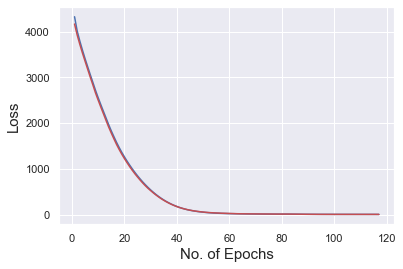

In [4]:
val_loss = hist.history["val_loss"][1:]
loss = hist.history["loss"][1:]
epochs = range(1, len(val_loss)+1)

plt.plot(epochs, loss, color = "b")
plt.plot(epochs, val_loss, color = "r")
plt.xlabel("No. of Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)

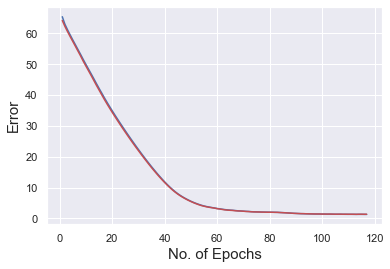

In [5]:
val_error = hist.history["val_mean_absolute_error"][1:]
training_error = hist.history["mean_absolute_error"][1:]
epochs = range(1, len(val_error)+1)

plt.plot(epochs, training_error, color = "b")
plt.plot(epochs, val_error, color = "r")
#plt.yticks(np.arange(0, max(training_error), 1))
#plt.xticks(np.arange(0, max(epochs)+1, 5))
plt.xlabel("No. of Epochs", fontsize=15)
plt.ylabel("Error", fontsize=15)
plt.show()

## Evaluating the model

In [6]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

1814/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [7]:
print ("Test Loss: {:.2f}, Expected Deviation for Prediction: {:.2f}".format(test_loss, test_accuracy))

Test Loss: 3.77, Expected Deviation for Prediction: 1.36
